# Imports and Boilerplate

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
from jump_detection.processor import TimeSeriesProcessor
from jump_detection.utils import normalize_features, get_eps, get_class_labels, calculate_median_jump, normalize_jump
from jump_detection.rolling_Ftest import *

# Initialization


In [20]:
# Define a window size for the moving Fstat
window_size = 10
gap_size = 10


# Step 1: Identify all jumps

In [21]:
processor = TimeSeriesProcessor(window_size, gap_size)
processor.load_data("13_4_decay_exp_data.csv")
processor.data = processor.data[0:100,1:]

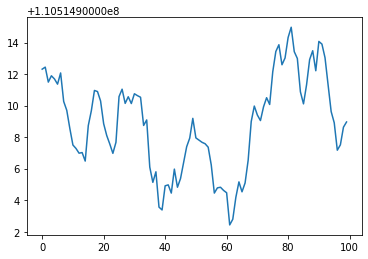

In [22]:
plt.plot(processor.data[:,1])
plt.show()

In [23]:
processor.data.shape

(100, 2)

In [24]:
help(rolling_F_statistic)

Help on CPUDispatcher in module jump_detection.rolling_Ftest:

rolling_F_statistic(X_samples, n1, n2, g)
    Return F-statistic of rolling window over sequence of random samples
    
    To detect changes in noisy multivariate time-series data it is useful
    to consider a null hypothesis for a pair of moving windows, namely,
    their is no difference between their average values. The statistical
    approach of analysis of variance (ANOVA) provides a formal framework
    for asking this question by conducting an F-test comparing the pair
    of windows.
    
    For this filter we consider a pair of windows with lengths `n1` and `n2`
    with a gap of length `g` in between.
    
    
              Window 1            Gap              Window 2     
        [ ----- n1 ----- ) [ ----- g -----) [ ------ n2 -------)
        |                |                  |                  |
        i           i + n1 - 1         i + n1 + g         i + n1 + n2 + g - 1
    
    
    For a sequence of

In [25]:
fstats = rolling_F_statistic_slow(processor.data, 10, 10, 0)

In [26]:
segments = processor.process_data()


LinAlgError: Matrix is singular to machine precision.

In [ ]:
plt.plot(processor.moving_fstats)

# Step 2: Reduce to single-event jumps

## Operating on individual segments

In [ ]:
# Now segments contains a list of Segment objects.
# for i, segment in enumerate(segments[0:1]):
#     print(f"Segment {i}:")
#     print("Original:")
#     print(segment.original)
#     print("Fstats:")
#     print(segment.Fstats)
#     print("\n")

In [ ]:
len(segments)

In [ ]:
segment = segments[0]
segment.calculate_features()
segment.features

In [ ]:
segment.original

## Getting all features

In [ ]:
jump_features = []

# Now segments contains a list of Segment objects.
for i, segment in enumerate(segments):
    segment.calculate_features()
    jump_features.append(segment.features)
jump_features = np.array(jump_features)

In [ ]:
jump_features = normalize_features(jump_features)

## Plotting Feature Space and Eps Determination

In [ ]:
jump_features.shape

In [ ]:
plt.scatter(jump_features[:,1],jump_features[:,2])

In [ ]:
eps = get_eps(jump_features)

In [ ]:
labels = get_class_labels(jump_features, eps/6)

In [ ]:
plt.scatter(jump_features[:,1],jump_features[:,2], c = labels)

In [ ]:
X = np.mean(segment.original[-window_size:], axis = 1)

In [ ]:
segment.calculate_freq_shift(2)

In [ ]:
X

In [ ]:
val = calculate_median_jump(segments)

In [ ]:
val

In [ ]:
normalize_jump(val,0,1)

In [ ]:
for segment in segments:
        for i in range(segment.original.shape[1]):
            ts = segment.original[:,i]
            test[i].append(ts)

In [ ]:
len(segments)

In [ ]:
segment.original.shape


In [ ]:
val